# Short data discovery

In [16]:
import os

print(os.getcwd())

dir_names = ", ".join(os.listdir("./datasets/gan-getting-started"))
print("The data are made of the following directories:", dir_names)

d:\repositories\something-of-a-painter-myself\data
The data are made of the following directories: monet_jpg, monet_tfrec, photo_jpg, photo_tfrec


First, we take a look at how many images we deal with.
The `*_jpg` directories contain the images while the others probably contain
the metadata.

In [14]:
monet_dir_files = os.listdir("./datasets/gan-getting-started/monet_jpg")
print("Number if Monet paintings:", len(monet_dir_files))
print("Sample of the image names:", ", ".join(monet_dir_files[:5]))

print()

photo_dir_files = os.listdir("./datasets/gan-getting-started/photo_jpg")
print("Number of photos:", len(photo_dir_files))
print("Sample of the image names:", ", ".join(photo_dir_files[:5]))

Number if Monet paintings: 300
Sample of the image names: 000c1e3bff.jpg, 011835cfbf.jpg, 0260d15306.jpg, 049e293b93.jpg, 05144e306f.jpg

Number of photos: 7038
Sample of the image names: 00068bc07f.jpg, 000910d219.jpg, 000ded5c41.jpg, 00104fd531.jpg, 001158d595.jpg


- Classes are unbalanced.

## What dimensions do the images have?
First the photos:

In [35]:
photos = []
for photo_file_name in photo_dir_files:
    photo = cv2.imread(f"./datasets/gan-getting-started/photo_jpg/{photo_file_name}")
    photos.append(photo)

first_shape = photos[0].shape
shapes_same = all(photo.shape == first_shape for photo in photos)
print(f"All photos have the same dimensions {first_shape}:", shapes_same)

All photos have the same dimensions (256, 256, 3): True


Now the Monet paintings:

In [42]:
monets = []
for monet_file_name in monet_dir_files:
    monet = cv2.imread(f"./datasets/gan-getting-started/monet_jpg/{monet_file_name}")
    monets.append(monet)

first_shape = monets[0].shape
shapes_same = all(monet.shape == first_shape for monet in monets)
print(f"All Monets have the same dimensions {first_shape}:", shapes_same)

All Monets have the same dimensions (256, 256, 3): True


Are the names of all images unique?

In [43]:
are_found = []
for monet_name in monet_dir_files:
    are_found.append(monet_name in set(photo_dir_files))

print("Monets and photos share file names:", any(are_found))

Monets and photos share file names: False


## Some examples of both cases

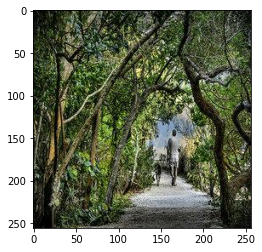

In [44]:
import matplotlib.pyplot as plt
import random
import cv2

random.seed(69)

def show_rand_img_from(imgs_path):
    photo_name = random.choice(os.listdir(imgs_path))
    photo = cv2.imread(imgs_path + photo_name)
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    plt.imshow(photo)

show_rand_img_from("./datasets/gan-getting-started/photo_jpg/")

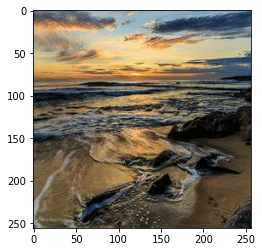

In [45]:
show_rand_img_from("./datasets/gan-getting-started/photo_jpg/")

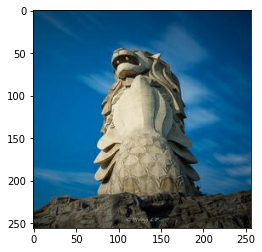

In [46]:
show_rand_img_from("./datasets/gan-getting-started/photo_jpg/")

Now some Monets:

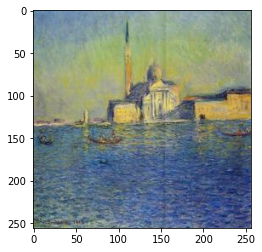

In [48]:
show_rand_img_from("./datasets/gan-getting-started/monet_jpg/")

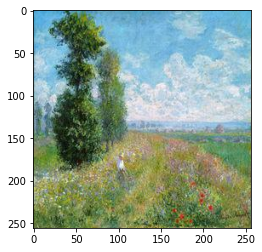

In [49]:
show_rand_img_from("./datasets/gan-getting-started/monet_jpg/")

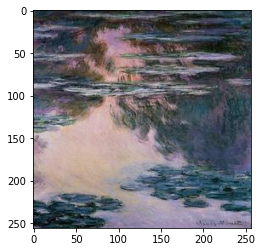

In [50]:
show_rand_img_from("./datasets/gan-getting-started/monet_jpg/")

In [61]:
monet_dir = "./datasets/gan-getting-started/monet_jpg/"
monet_sum = cv2.imread(monet_dir + monet_dir_files[0])
 

for monet_name in os.listdir(monet_dir)[1:]:
    monet = cv2.imread(monet_dir + monet_name)
    monet_sum += monet

print(monet + monet + monet)
    


# photo = cv2.imread("./datasets/gan-getting-started/monet_jpg/0260d15306.jpg")

# avg_img
# print(photo / 255)

[[[229 235 235]
  [223 229 229]
  [214 220 220]
  ...
  [188 215   1]
  [182 209 251]
  [143 170 212]]

 [[226 232 232]
  [220 226 226]
  [214 220 220]
  ...
  [185 212 254]
  [194 221   7]
  [167 194 236]]

 [[223 229 229]
  [217 223 223]
  [211 217 217]
  ...
  [182 215   1]
  [188 221   7]
  [158 191 233]]

 ...

 [[168 189  50]
  [159 177  32]
  [129 144 243]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[192 210  65]
  [162 180  29]
  [111 126 225]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[231 249 104]
  [138 156   5]
  [ 63  78 177]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
